In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import urllib
from pathlib import Path
import os
import urllib
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

pd.options.display.max_columns = 50

In [44]:
relative_path = '/raw/train.csv'

cur_wd = os.getcwd()

file_path = cur_wd + relative_path


In [45]:
def load_set_data(target_month, outlier_cutoff, income_cutoff):
    relative_path = '/raw/train.csv'
    cur_wd = os.getcwd()
    file_path = cur_wd + relative_path

    if not Path(file_path).exists():
        print('Filepath does not exist in the "raw" folder. Check again')
        
    else:
        print('Loading and cleaning data.')

    d_types = {'ID': str, 'Customer_ID': str, 'Month': str, 'Name': str, 'Age': int, 'SSN': str, 'Occupation': str, 'Annual_Income': str, 'Monthly_Inhand_Salary': float, 'Num_Bank_Accounts': int, 'Num_Credit_Card': int, 'Interest_Rate': int, 'Num_of_Loan': int,'Type_of_Loan': str,
'Delay_from_due_date': int, 'Num_of_Delayed_Payment': int, 'Changed_Credit_Limit': float, 'Num_Credit_Inquiries': float, 'Credit_Mix': str, 'Outstanding_Debt': float, 'Credit_Utilization_Ratio': float, 'Credit_History_Age': float, 'Payment_of_Min_Amount': str, 'Total_EMI_per_month': float,
       'Amount_invested_monthly': float, 'Payment_Behaviour': str, 'Monthly_Balance':float, 'Credit_Score':str}


    df = pd.read_csv(file_path)
    df['Annual_Income'] = df['Annual_Income'].str.replace('_', '').astype(float)
    df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_', '').astype(float)
    single_month_frame = df[df['Month'] ==  target_month]
    single_month_frame = single_month_frame[single_month_frame['Type_of_Loan'] !=  'Auto Loan']
    single_month_frame = single_month_frame[single_month_frame['Amount_invested_monthly'] < outlier_cutoff]
    single_month_frame = single_month_frame[single_month_frame['Annual_Income'] < income_cutoff]
    

    return single_month_frame

In [46]:
datag = load_set_data('April', 1 , 8000) # Check datag vs dataf and outlier cutoff input

print(np.max(datag['Annual_Income']))
print(np.min(datag['Annual_Income']))

Loading and cleaning data.
7455.07
7012.31


C:\Users\adith\AppData\Local\Temp\ipykernel_12780\559672799.py:17: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Loading and cleaning data.


C:\Users\adith\AppData\Local\Temp\ipykernel_12780\559672799.py:17: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Head of the standardized predictors for March:
   Annual_Income
0      -0.812818
1      -0.401085
2      -0.509894
3      -0.382770
4       0.621609
Training set size for March: (8340, 1)
Testing set size for March: (2781, 1)


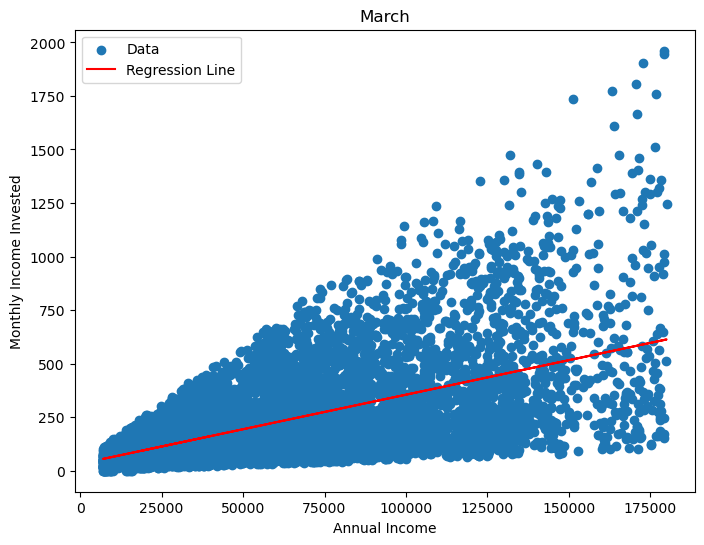

Loading and cleaning data.


C:\Users\adith\AppData\Local\Temp\ipykernel_12780\559672799.py:17: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Head of the standardized predictors for April:
   Annual_Income
0      -0.816538
1      -0.405158
2       2.426876
3      -0.513874
4      -0.386859
Training set size for April: (8390, 1)
Testing set size for April: (2797, 1)


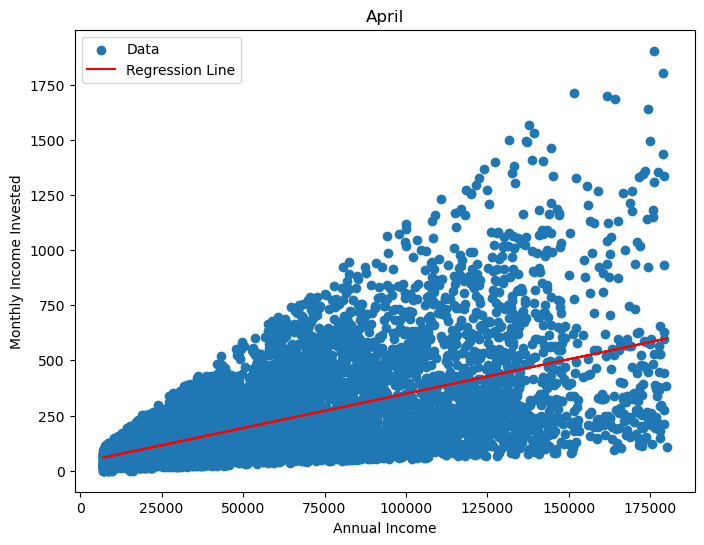

Loading and cleaning data.


C:\Users\adith\AppData\Local\Temp\ipykernel_12780\559672799.py:17: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Head of the standardized predictors for July:
   Annual_Income
0      -0.816321
1      -0.404174
2       2.433147
3      -0.513092
4      -0.385841
Training set size for July: (8401, 1)
Testing set size for July: (2801, 1)


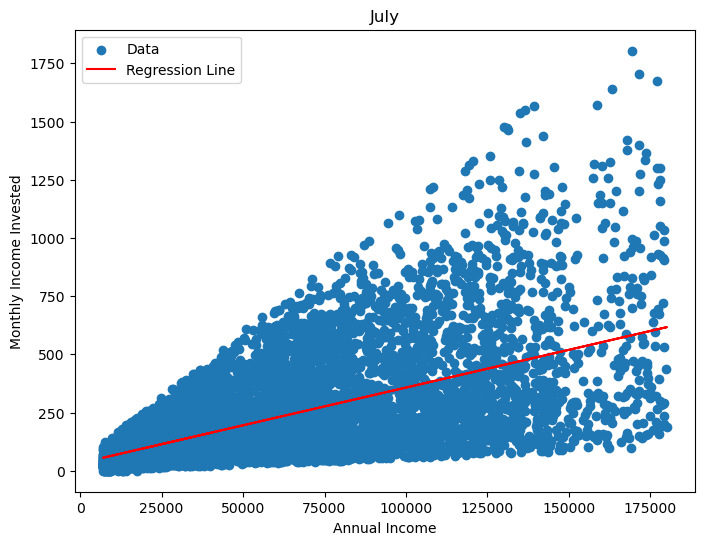

In [47]:
# Selecting predictor
predictors = ['Annual_Income']
response_variable = 'Amount_invested_monthly'
months = [ 'March' , 'April' , 'July' ]

for mn in months:
    dataf = load_set_data(mn , 5000 , 500000)
    if dataf is not None:
        predictor_data = dataf[predictors] #standardizing the predictors
        scaler = StandardScaler()
        standardized_predictors = scaler.fit_transform(predictor_data)

        standardized_df = pd.DataFrame(standardized_predictors, columns=predictors) # Convert the standardized predictors to a DataFrame
        print(f"Head of the standardized predictors for {mn}:")
        print(standardized_df.head())

        X_train, X_test, y_train, y_test = train_test_split(standardized_df, dataf[response_variable], test_size=0.25, random_state=42)  # Splitting the data into training and testing sets

        print(f"Training set size for {mn}: {X_train.shape}")
        print(f"Testing set size for {mn}: {X_test.shape}")


        plt.figure(figsize=(8,6))
        plt.scatter(x=dataf['Annual_Income'], y=dataf['Amount_invested_monthly'], label= 'Data')
        plt.xlabel('Annual Income')
        plt.ylabel('Monthly Income Invested')
        plt.title(mn)

        # Fitting the linear regression model
        lm = LinearRegression()
        X = dataf['Annual_Income'].values.reshape(-1, 1)  # Reshape for sklearn
        y = dataf['Amount_invested_monthly']
        lm.fit(X, y)
        plt.plot(dataf['Annual_Income'], lm.predict(X), color='red', label='Regression Line')
        plt.legend()
        plt.show()

In [48]:
# Fitting the KNN model
knn = KNeighborsRegressor(n_neighbors=250)
knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=250)

In [49]:
# prediction accuracy rate
accuracy = knn.score(X_test, y_test)
print(accuracy)

0.36506776596387447


In [50]:
# prediction error rate
predictor_error = 1 - accuracy
print(predictor_error)

0.6349322340361255
